In [1]:
import pandas as pd

path="C:/Studia/CMS/Magisterka/Saptarshi/Jan_Sal/KMean4_AML_prepared_data.csv" 
data = pd.read_csv(path, na_values='NULL')
data.set_index('Pat', inplace=True)

print(data['clusters_pred'].value_counts())

2    1181
0     363
3     103
1      27
Name: clusters_pred, dtype: int64


In [2]:
"""Minor cluster receive label 1, the rest 0"""
data["clusters_pred"].replace(2,0, inplace=True)
data["clusters_pred"].replace(3,0, inplace=True)

print(data['clusters_pred'].value_counts())
data.shape

0    1647
1      27
Name: clusters_pred, dtype: int64


(1674, 84)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data['clusters_pred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 1.0


[[498   0]
 [  0   5]]


C:\Users\Szymon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


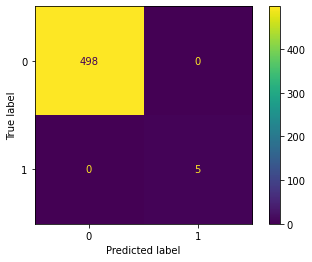

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, predictions))

plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import recall_score

print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

In [ ]:
from sklearn.metrics import f1_score

print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

AUC for our classifier is: 1.0


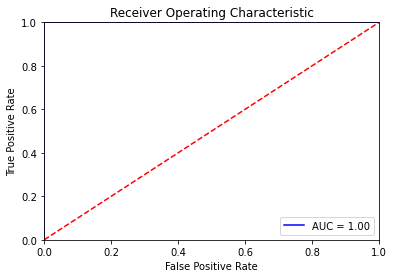

In [8]:
from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for our classifier is: {roc_auc}")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()